# Continuous Assemblies: Quadratic assemblies

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In this notebook we will talk about continuous assemblies and in specific we will board the the assemblies of a two quadratic regressions.

### We import all the libraries

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Creation of all the points to train and test the model

We set the seed

In [2]:
np.random.seed(10)

Creation of the points

In [3]:
v = (4/3)*math.pi

In [4]:
#---------------------------------------------------

#Parameters of the model

a = 0
b = 2*math.pi

#---------------------------------------------------

N = 20

#---------------------------------------------------

h = (b-a)/N

#---------------------------------------------------

# Seting the first value of the domain

x = a - h

#---------------------------------------------------

X = []
y = []

#---------------------------------------------------

for i in range(N + 1):

    x = round(x + h, 1)

    f_x = np.sin(x)

    X.append(x)
    y.append(f_x)

#---------------------------------------------------

Creation of dataframe

In [5]:
df = pd.DataFrame()

In [6]:
df['X'] = pd.Series(X).astype(float)
df['y'] = pd.Series(y).astype(float)

In [7]:
df

,X,y
0,0.0,0.000000
1,0.3,0.295520
2,0.6,0.564642
3,0.9,0.783327
4,1.2,0.932039
5,1.5,0.997495
6,1.8,0.973848
7,2.1,0.863209
8,2.4,0.675463
9,2.7,0.427380


Graph of these points

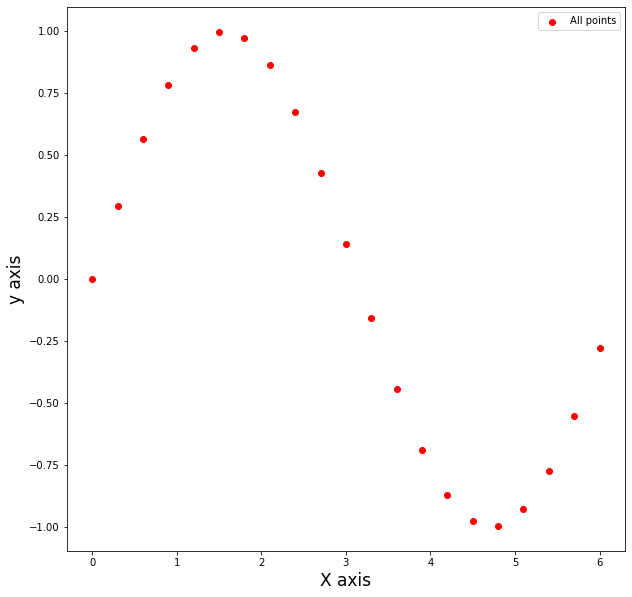

In [8]:
figure(figsize=(10,10))
plt.scatter(df['X'], df['y'], color = 'red', label = 'All points')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

Separating the train set and the test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=22)

In [10]:
train = pd.DataFrame()
test = pd.DataFrame()

In [11]:
train['X'] = pd.Series(X_train).astype(float)
train['y'] = pd.Series(y_train).astype(float)

In [12]:
test['X'] = pd.Series(X_test).astype(float)
test['y'] = pd.Series(y_test).astype(float)

Graph of train and test set

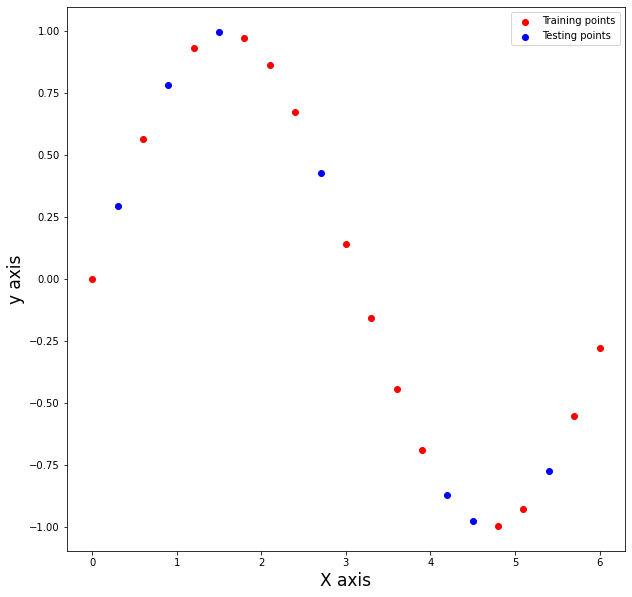

In [13]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

Creation of filters of all data

In [14]:
df['X2'] = df['X']**2

In [15]:
f_1_df = (df['X'] <= v)
f_2_df = (df['X'] > v)

### Mathematical Development

First of all, we must to say exists two ways of to do this aasemble. The first "Left to the right" and the second "Right to the left".

### $ \underline{1. \ Left \ \ to \ \ the \ \ right:} $

We will consider two functions: 

$ f_1(x) = \alpha_2^{left} \cdot x^2 + \alpha_1^{left} \cdot x + \alpha_0^{left} \ \ \  $ for $ \ \ \ a \leq x \leq v $

$ f_2(x) = \beta_2^{left} \cdot x^2 + \beta_1^{left} \cdot x + \beta_0^{left} \ \ \  $ for $ \ \ \ v \leq x \leq b $

*$\underline{Step \ 1:}$* We estimate the values of $ \alpha_2^{left} $, $ \alpha_1^{left} $ and $ \alpha_0^{left}$. From now on, we will write the known values with green color and the unkown values with red color.

*$\underline{Step \ 2:}$* For the union of the first and second function to be continued we need the following equation is fulfilled:

$ f_1(v) = f_2(v) $

$ \Rightarrow $

$ \textcolor{green}{\alpha_2^{left}} \cdot \textcolor{green}{v^2} + \textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v} + \textcolor{green}{\alpha_0^{left}} = \textcolor{red}{\beta_2^{left}} \cdot \textcolor{green}{v^2} + \textcolor{red}{\beta_1^{left}} \cdot \textcolor{green}{v} + \textcolor{red}{\beta_0^{left}} $

$ \Rightarrow $

$ \boxed{\textcolor{red}{\beta_0^{left}} = \textcolor{green}{\alpha_2^{left}} \cdot \textcolor{green}{v^2} + \textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v} + \textcolor{green}{\alpha_0^{left}} - \textcolor{red}{\beta_2^{left}} \cdot \textcolor{green}{v^2} - \textcolor{red}{\beta_1^{left}} \cdot \textcolor{green}{v}} \ \ \ (1)  $

Substituting this result in $ f_2(x)$ we obtain:

$ f_2(x) = \textcolor{red}{\beta_2^{left}} \cdot x^2 + \textcolor{red}{\beta_1^{left}} \cdot x + \textcolor{green}{\alpha_2^{left}} \cdot \textcolor{green}{v^2} + \textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v} + \textcolor{green}{\alpha_0^{left}} -  \textcolor{red}{\beta_2^{left}} \cdot \textcolor{green}{v^2} - \textcolor{red}{\beta_1^{left}} \cdot \textcolor{green}{v} $ 

$ \Rightarrow $

$ f_2(x) - (\textcolor{green}{\alpha_2^{left}} \cdot \textcolor{green}{v^2} + \textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v} + \textcolor{green}{\alpha_0^{left}}) = \textcolor{red}{\beta_2^{left}} \cdot (x^2-\textcolor{green}{v^2}) + \textcolor{red}{\beta_1^{left}} \cdot (x-\textcolor{green}{v}) $ 

We create the next new variables:

$ u_2 = f_2(x) - (\textcolor{green}{\alpha_2^{left}} \cdot \textcolor{green}{v^2} + \textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v} + \textcolor{green}{\alpha_0^{left}})  $

$ W_{2, 1} = x - \textcolor{green}{v} $

$ W_{2, 2} = x^2 - \textcolor{green}{v^2} $

Thus we have the next quadratic regressión without intercept:

$ u_2 = \textcolor{red}{\beta_2^{left}} \cdot W_{2, 2} + \textcolor{red}{\beta_1^{left}} \cdot W_{2, 1} $

Once we have the value of $ \textcolor{red}{\beta_1^{left}} $ and $ \textcolor{red}{\beta_2^{left}} $ we replaced these values in $(1)$ to obtain the value of $ \textcolor{red}{\beta_0^{left}} $.

### $ \underline{2. \ Right \ \ to \ \ the \ \ left:} $

We will consider two functions: 

$ f_1(x) = \alpha_2^{right} \cdot x^2 + \alpha_1^{right} \cdot x + \alpha_0^{right} \ \ \  $ for $ \ \ \ a \leq x \leq v $

$ f_2(x) = \beta_2^{right} \cdot x^2 + \beta_1^{right} \cdot x + \beta_0^{right} \ \ \  $ for $ \ \ \ v \leq x \leq b $

*$\underline{Step \ 1:}$* We estimate the values of $\beta_2^{right}$, $\beta_1^{right}$ and $\beta_0^{right}$. From now on, we will write the known values with green color and the unkown values with red color.

*$\underline{Step \ 2:}$* For the union of the first and second function to be continued we need the following equation is fulfilled:

$ f_1(v) = f_2(v) $

$ \Rightarrow $

$ \textcolor{red}{\alpha_2^{right}} \cdot \textcolor{green}{v^2} + \textcolor{red}{\alpha_1^{right}} \cdot \textcolor{green}{v} + \textcolor{red}{\alpha_0^{right}} = \textcolor{green}{\beta_2^{right}} \cdot \textcolor{green}{v^2} + \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v} + \textcolor{green}{\beta_0^{right}} $

$ \Rightarrow $

$ \boxed{\textcolor{red}{\alpha_0^{right}} = \textcolor{green}{\beta_2^{right}} \cdot \textcolor{green}{v^2} + \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v} + \textcolor{green}{\beta_0^{right}} - \textcolor{red}{\alpha_1^{right}} \cdot \textcolor{green}{v} - \textcolor{red}{\alpha_2^{right}} \cdot \textcolor{green}{v^2} } \ \ \ (2) $

Substituting this result in $ f_1(x)$ we obtain:

$ f_1(x) = \textcolor{red}{\alpha_2^{right}} \cdot x^2 + \textcolor{red}{\alpha_1^{right}} \cdot x + \textcolor{green}{\beta_2^{right}} \cdot \textcolor{green}{v^2} + \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v} + \textcolor{green}{\beta_0^{right}} - \textcolor{red}{\alpha_1^{right}} \cdot \textcolor{green}{v} - \textcolor{red}{\alpha_2^{right}} \cdot \textcolor{green}{v^2} $ 

$ \Rightarrow $

$ f_1(x) - (\textcolor{green}{\beta_2^{right}} \cdot \textcolor{green}{v^2} + \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v} + \textcolor{green}{\beta_0^{right}}) = \textcolor{red}{\alpha_2^{right}} \cdot (x^2 - \textcolor{green}{v^2}) + \textcolor{red}{\alpha_1^{right}} \cdot (x - \textcolor{green}{v}) $

We create the next new variables:

$ u_1 = f_1(x) - (\textcolor{green}{\beta_2^{right}} \cdot \textcolor{green}{v^2} + \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v} + \textcolor{green}{\beta_0^{right}}) $

$ W_{1, 1} = x - \textcolor{green}{v} $

$ W_{1, 2} = x^2 - \textcolor{green}{v^2} $

Thus we have the next linear regressión without intercept:

$ u_1 = \textcolor{red}{\alpha_2^{right}} \cdot W_{1, 2} + \textcolor{red}{\alpha_1^{right}} \cdot W_{1, 1} $

Once we have the value of $ \textcolor{red}{\alpha_1^{right}} $ and $ \textcolor{red}{\alpha_2^{right}} $ we replaced these values in $(2)$ to obtain the value of $ \textcolor{red}{\alpha_0^{right}} $.

### Training

In [16]:
f_1 = (train['X'] <= v)
f_2 = (train['X'] > v)

In [17]:
f_1_test = (test['X'] <= v)
f_2_test = (test['X'] > v)

In [18]:
X_1 = train[f_1][['X']].values
y_1 = train[f_1]['y'].values

In [19]:
X_2 = train[f_2][['X']].values
y_2 = train[f_2]['y'].values

### $ \underline{1. \ Left \ \ to \ \ the \ \ right:} $

**a. First section**

In [20]:
W_1_left = np.concatenate([X_1**2, X_1], axis = 1)

In [21]:
reg_1_left = LinearRegression().fit(W_1_left, y_1)

In [22]:
alpha_2_left, alpha_1_left = reg_1_left.coef_
alpha_0_left = reg_1_left.intercept_

In [23]:
alpha_2_left, alpha_1_left, alpha_0_left

(-0.33257095986065593, 1.0686698656705762, 0.05001840210763525)

Graph

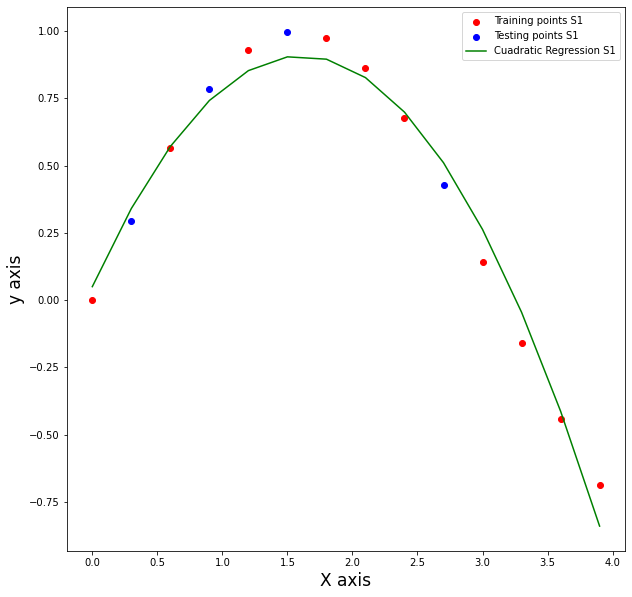

In [24]:
figure(figsize=(10,10))
plt.scatter(train[f_1]['X'], train[f_1]['y'], color = 'red', label = 'Training points S1')
plt.scatter(test[f_1_test]['X'], test[f_1_test]['y'], color = 'blue', label = 'Testing points S1')
plt.plot(df[f_1_df]['X'], alpha_2_left*df[f_1_df]['X2'] + alpha_1_left*df[f_1_df]['X'] + alpha_0_left, color = 'green', label = 'Cuadratic Regression S1')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

**b. Second section**

In [25]:
u_2_left = y_2 - (alpha_2_left*(v**2) + alpha_1_left*v + alpha_0_left)
W_2_1_left = X_2 - v
W_2_2_left = (X_2)**2 - v**2

In [26]:
W_2_left = np.concatenate([W_2_2_left, W_2_1_left], axis = 1)

In [27]:
reg_2_left = LinearRegression(fit_intercept=False).fit(W_2_left, u_2_left)

In [28]:
beta_2_left, beta_1_left = reg_2_left.coef_

In [29]:
beta_2_left, beta_1_left

(0.11125665137469243, -0.5780940394019563)

Remembering

$ \boxed{\textcolor{red}{\beta_0^{left}} = \textcolor{green}{\alpha_2^{left}} \cdot \textcolor{green}{v^2} + \textcolor{green}{\alpha_1^{left}} \cdot \textcolor{green}{v} + \textcolor{green}{\alpha_0^{left}} - \textcolor{red}{\beta_2^{left}} \cdot \textcolor{green}{v^2} - \textcolor{red}{\beta_1^{left}} \cdot \textcolor{green}{v}} \ \ \ (1)  $

In [30]:
beta_0_left = alpha_2_left*(v**2) + alpha_1_left*v + alpha_0_left - beta_2_left*(v**2) - beta_1_left*v

In [31]:
beta_2_left, beta_1_left, beta_0_left

(0.11125665137469243, -0.5780940394019563, -0.8394160963703023)

Graph

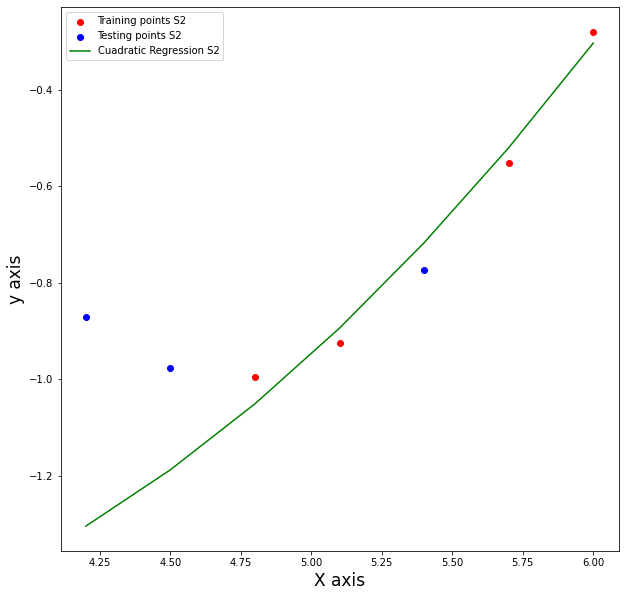

In [32]:
figure(figsize=(10,10))
plt.scatter(train[f_2]['X'], train[f_2]['y'], color = 'red', label = 'Training points S2')
plt.scatter(test[f_2_test]['X'], test[f_2_test]['y'], color = 'blue', label = 'Testing points S2')
plt.plot(df['X'][f_2_df], beta_2_left*df['X2'][f_2_df] + beta_1_left*df['X'][f_2_df] + beta_0_left, color = 'green', label = 'Cuadratic Regression S2')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

$ \underline{Assembly \ \ of \ \ all \ \ points:} $

In [33]:
x_train_left = list(df['X'].sort_values())

In [34]:
y_pred_train_left = []

for x in x_train_left:
    if x <= v:
        y_pred_train_left.append(alpha_2_left*(x**2) + alpha_1_left*x + alpha_0_left)
    
    else:
        y_pred_train_left.append(beta_2_left*(x**2) + beta_1_left*x + beta_0_left)

Graph

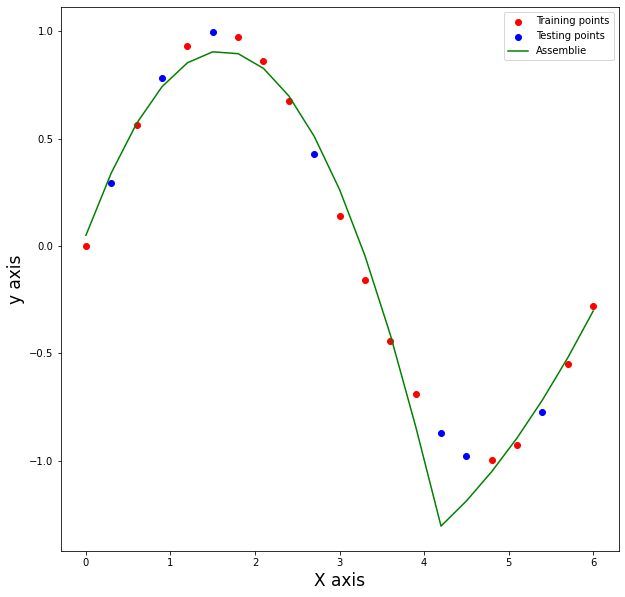

In [35]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')
plt.plot(x_train_left, y_pred_train_left, color = 'green', label = 'Assemblie')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

**Performance:**

i. Train:

In [36]:
train['y_p_left'] = f_1*(alpha_2_left*(train['X']**2) + alpha_1_left*train['X'] + alpha_0_left) + f_2*(beta_2_left*(train['X']**2) + beta_1_left*train['X'] + beta_0_left)

In [37]:
sq_err_train_left = round(((train['y'] - train['y_p_left'])**2).sum()/len(train), 2)

In [38]:
abs_err_train_left = round(abs(train['y'] - train['y_p_left']).sum()/len(train), 2)

In [39]:
sq_err_train_left, abs_err_train_left

(0.01, 0.06)

ii. Test

In [40]:
test['y_p_left'] = f_1_test*(alpha_2_left*(test['X']**2) + alpha_1_left*test['X'] + alpha_0_left) + f_2_test*(beta_2_left*(test['X']**2) + beta_1_left*test['X'] + beta_0_left)

In [41]:
sq_err_test_left = round(((test['y'] - test['y_p_left'])**2).sum()/len(test), 2)

In [42]:
abs_err_test_left = round(abs(test['y'] - test['y_p_left']).sum()/len(test), 2)

In [43]:
sq_err_test_left, abs_err_test_left

(0.04, 0.14)

### $ \underline{2. \ Right \ \ to \ \ the \ \ left:} $

**a. First section**

In [44]:
W_2_right = np.concatenate([X_2**2, X_2], axis = 1)

In [45]:
reg_2_right = LinearRegression().fit(W_2_right, y_2)

In [46]:
beta_2_right, beta_1_right = reg_2_right.coef_
beta_0_right = reg_2_right.intercept_

In [47]:
beta_2_right, beta_1_right, beta_0_left

(0.3720742923900065, -3.415526570810761, -0.8394160963703023)

Graph

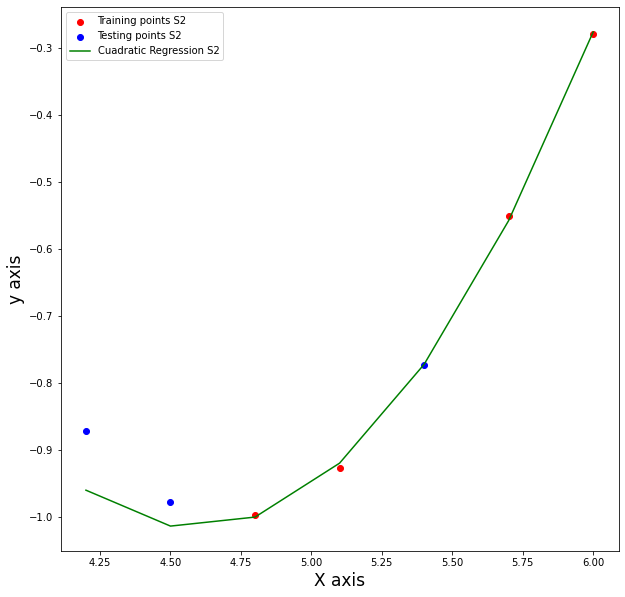

In [48]:
figure(figsize=(10,10))
plt.scatter(train[f_2]['X'], train[f_2]['y'], color = 'red', label = 'Training points S2')
plt.scatter(test[f_2_test]['X'], test[f_2_test]['y'], color = 'blue', label = 'Testing points S2')
plt.plot(df[f_2_df]['X'], beta_2_right*df[f_2_df]['X2'] + beta_1_right*df[f_2_df]['X'] + beta_0_right, color = 'green', label = 'Cuadratic Regression S2')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

**b. Second section**

In [49]:
u_1_right = y_1 - (beta_2_right*(v**2) + beta_1_right*v + beta_0_right)
W_1_1_right = X_1 - v
W_1_2_right = (X_1)**2 - v**2

In [50]:
W_1_right = np.concatenate([W_1_2_right, W_1_1_right], axis = 1)

In [51]:
reg_1_right = LinearRegression(fit_intercept=False).fit(W_1_right, u_1_right)

In [52]:
alpha_2_right, alpha_1_right = reg_1_right.coef_

In [53]:
alpha_2_right, alpha_1_right

(-0.26689672445777046, 0.8570028705421485)

Remembering

$ \boxed{\textcolor{red}{\alpha_0^{right}} = \textcolor{green}{\beta_2^{right}} \cdot \textcolor{green}{v^2} + \textcolor{green}{\beta_1^{right}} \cdot \textcolor{green}{v} + \textcolor{green}{\beta_0^{right}} - \textcolor{red}{\alpha_1^{right}} \cdot \textcolor{green}{v} - \textcolor{red}{\alpha_2^{right}} \cdot \textcolor{green}{v^2} } \ \ \ (2) $

In [54]:
alpha_0_right = beta_2_right*(v**2) + beta_1_right*v + beta_0_right - alpha_1_right*v - alpha_2_right*(v**2)

In [55]:
alpha_2_right, alpha_1_right, alpha_0_right

(-0.26689672445777046, 0.8570028705421485, 0.13705290621717214)

Graph

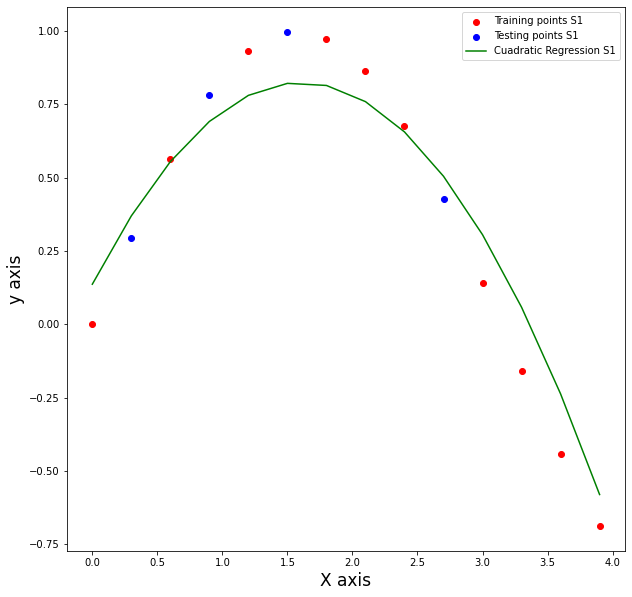

In [56]:
figure(figsize=(10,10))
plt.scatter(train[f_1]['X'], train[f_1]['y'], color = 'red', label = 'Training points S1')
plt.scatter(test[f_1_test]['X'], test[f_1_test]['y'], color = 'blue', label = 'Testing points S1')
plt.plot(df['X'][f_1_df], alpha_2_right*df['X2'][f_1_df] + alpha_1_right*df['X'][f_1_df] + alpha_0_right, color = 'green', label = 'Cuadratic Regression S1')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

$ \underline{Assembly \ \ of \ \ all \ \ points:} $

In [57]:
x_train_right = list(df['X'].sort_values())

In [58]:
y_pred_train_right = []

for x in x_train_right:
    if x <= v:
        y_pred_train_right.append(alpha_2_right*(x**2) + alpha_1_right*x + alpha_0_right)
    
    else:
        y_pred_train_right.append(beta_2_right*(x**2) + beta_1_right*x + beta_0_right)

Graph

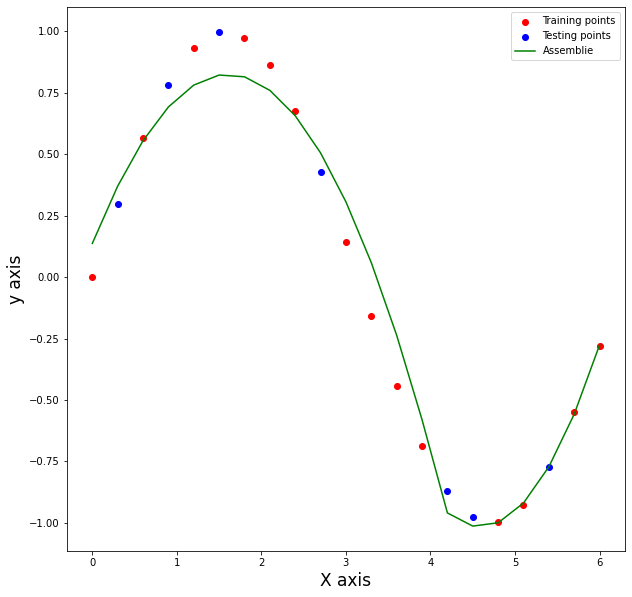

In [59]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')
plt.plot(x_train_right, y_pred_train_right, color = 'green', label = 'Assemblie')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

**Performance:**

i. Train:

In [60]:
train['y_p_right'] = f_1*(alpha_2_right*(train['X']**2) + alpha_1_right*train['X'] + alpha_0_right) + f_2*(beta_2_right*(train['X']**2) + beta_1_right*train['X'] + beta_0_right)

In [61]:
sq_err_train_right = round(((train['y'] - train['y_p_right'])**2).sum()/len(train), 2)

In [62]:
abs_err_train_right = round(abs(train['y'] - train['y_p_right']).sum()/len(train), 2)

In [63]:
sq_err_train_right, abs_err_train_right

(0.01, 0.09)

ii. Test

In [64]:
test['y_p_right'] = f_1_test*(alpha_2_right*(test['X']**2) + alpha_1_right*test['X'] + alpha_0_right) + f_2_test*(beta_2_right*(test['X']**2) + beta_1_right*test['X'] + beta_0_right)

In [65]:
sq_err_test_right = round(((test['y'] - test['y_p_right'])**2).sum()/len(test), 2)

In [66]:
abs_err_test_right = round(abs(test['y'] - test['y_p_right']).sum()/len(test), 2)

In [67]:
sq_err_test_right, abs_err_test_right

(0.01, 0.08)

### Comparison of the two assemblies

**Performance**

i. Train:

In [68]:
sq_err_train_left, sq_err_train_right

(0.01, 0.01)

In [69]:
abs_err_train_left, abs_err_train_right

(0.06, 0.09)

ii. Test:

In [70]:
sq_err_test_left, sq_err_test_right

(0.04, 0.01)

In [71]:
abs_err_test_left, abs_err_test_right

(0.14, 0.08)

**Comments:** How we can see. The best performance in the test set is in the asemble where first we fit the set with less points and then the set with more points. For this reason we choose the "Right to Left" (R-L) model. 

**Graphic comparison**

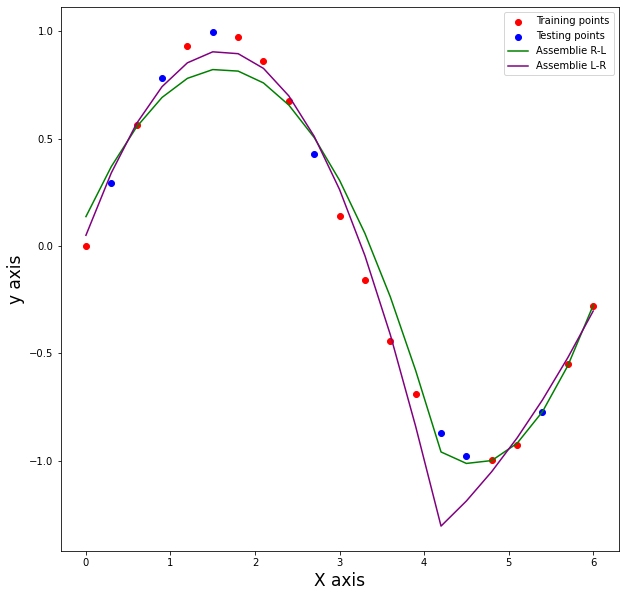

In [72]:
figure(figsize=(10,10))
plt.scatter(train['X'], train['y'], color = 'red', label = 'Training points')
plt.scatter(test['X'], test['y'], color = 'blue', label = 'Testing points')
plt.plot(x_train_right, y_pred_train_right, color = 'green', label = 'Assemblie R-L')
plt.plot(x_train_left, y_pred_train_left, color = 'purple', label = 'Assemblie L-R')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()

### Functions associated to the two assemblies

In [73]:
def assemblie_L_to_R(x):

    if x <= v:
        return alpha_2_left*(x**2) + alpha_1_left*x + alpha_0_left
    
    else:
        return beta_2_left*(x**2) + beta_1_left*x + beta_0_left

In [74]:
def assemblie_R_to_L(x):

    if x <= v:
        return alpha_2_right*(x**2) + alpha_1_right*x + alpha_0_right
    
    else:
        return beta_2_right*(x**2) + beta_1_right*x + beta_0_right

### Creation of columns with the predictions of the two models

In [75]:
df["y_pred_LR"] = df["X"].map(lambda x: assemblie_L_to_R(x))
df["y_pred_RL"] = df["X"].map(lambda x: assemblie_R_to_L(x))

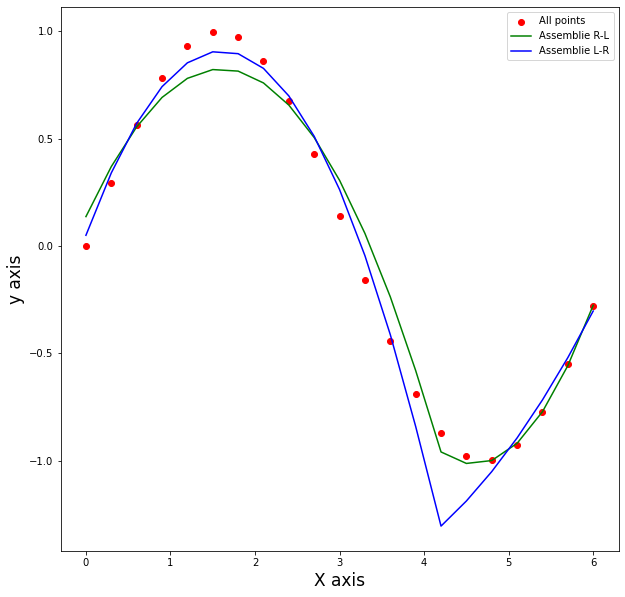

In [76]:
figure(figsize=(10,10))
plt.scatter(df['X'], df['y'], color = 'red', label = 'All points')
plt.plot(df['X'], df['y_pred_RL'], color = 'green', label = 'Assemblie R-L')
plt.plot(df['X'], df['y_pred_LR'], color = 'blue', label = 'Assemblie L-R')

plt.xlabel('X axis', size = 17)
plt.ylabel('y axis', size = 17)

plt.legend()
plt.show()